# Calculating Beta

In [66]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import yfinance as yf

ticker ='D05.SI'
start_date = '2016-1-1'
end_date = '2022-7-1'

data = pd.DataFrame()
data[f'{ticker}'] = yf.download(ticker,start_date,end_date)['Close']
data['STI'] = yf.download('^STI',start_date,end_date)['Close']

data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,D05.SI,STI
Date,,
2022-06-24,29.809999,3111.649902
2022-06-27,30.209999,3137.540039
2022-06-28,30.150000,3140.209961
2022-06-29,30.000000,3134.870117
2022-06-30,29.680000,3102.209961


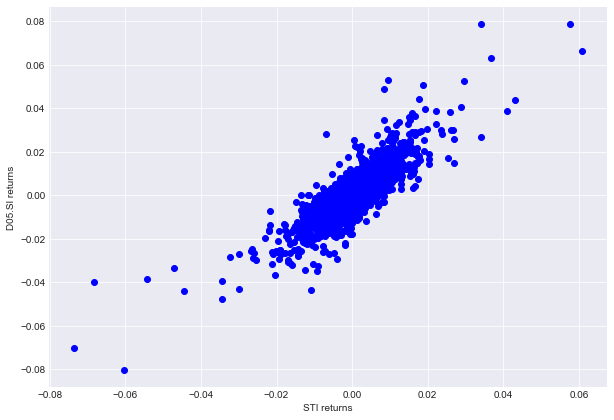

In [67]:
data[f'{ticker}_returns'] = data[f'{ticker}'].pct_change()
data['STI_returns'] = data['STI'].pct_change()
data = data.dropna()

y = data[f'{ticker}_returns']
x = data['STI_returns']

plt.figure(figsize=(10,7))
plt.scatter(x,y,color='b')
plt.xlabel('STI returns')
plt.ylabel(f'{ticker} returns')
plt.show()

## Covariance Method

In [78]:
m = np.cov(x,y)/np.var(x)
print(m)
f"The beta caluculated by covariance method is {round(m[0,1],2)}"

[[1.00061463 1.18768086]
 [1.18768086 1.97345253]]


'The beta caluculated by covariance method is 1.19'

## Regression Method

In [75]:
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.params)

alpha = results.params[0]
beta = results.params[1]
f"The beta calculated by Regression method is {round(beta,2)}"

const          0.000376
STI_returns    1.186951
dtype: float64


'The beta calculated by Regression method is 1.19'

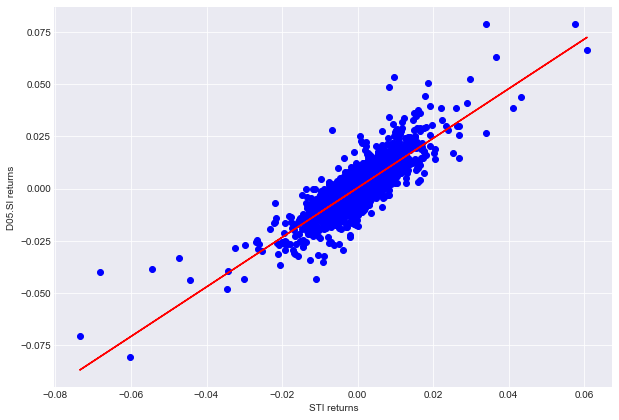

In [76]:
plt.figure(figsize=(10,7))
plt.scatter(data['STI_returns'],data[f'{ticker}_returns'],color='b')
x = data['STI_returns']
plt.plot(x,alpha+beta*x,color='r')
plt.xlabel('STI returns')
plt.ylabel(f'{ticker} returns')
plt.show()